In [ ]:
import tensorflow as tf
print("Tensorflow version " + tf.__version__)
try:
  tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU detection
  print('Running on TPU ', tpu.cluster_spec().as_dict()['worker'])
except ValueError:
  raise BaseException('ERROR: Not connected to a TPU runtime; please see the previous cell in this notebook for instructions!')
 
tf.config.experimental_connect_to_cluster(tpu)
tf.tpu.experimental.initialize_tpu_system(tpu)
tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)

Tensorflow version 2.4.1
Running on TPU  ['10.114.217.234:8470']


INFO:tensorflow:Initializing the TPU system: grpc://10.114.217.234:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.114.217.234:8470


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


In [ ]:
import os
import csv
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.signal import find_peaks
from scipy.signal import argrelextrema
from collections import defaultdict


In [ ]:
#LOADING DATASET
data = pd.read_csv('./finalDS.csv',index_col=0)
data['Date'] = pd.to_datetime(data['Date'])
data.head()

,Adj Close,Close,Date,High,Low,Open,Volume,S&P 500 PE Ratio
0,3756.07,3756.07,2020-12-31,3760.20,3726.88,3733.27,3172510000,37.850000
1,3732.04,3732.04,2020-12-30,3744.63,3730.21,3736.19,3145200000,37.842333
2,3727.04,3727.04,2020-12-29,3756.12,3723.31,3750.01,3387030000,37.834667
3,3735.36,3735.36,2020-12-28,3740.51,3723.03,3723.03,3527460000,37.827000
4,3703.06,3703.06,2020-12-24,3703.82,3689.32,3694.03,1885090000,37.796333


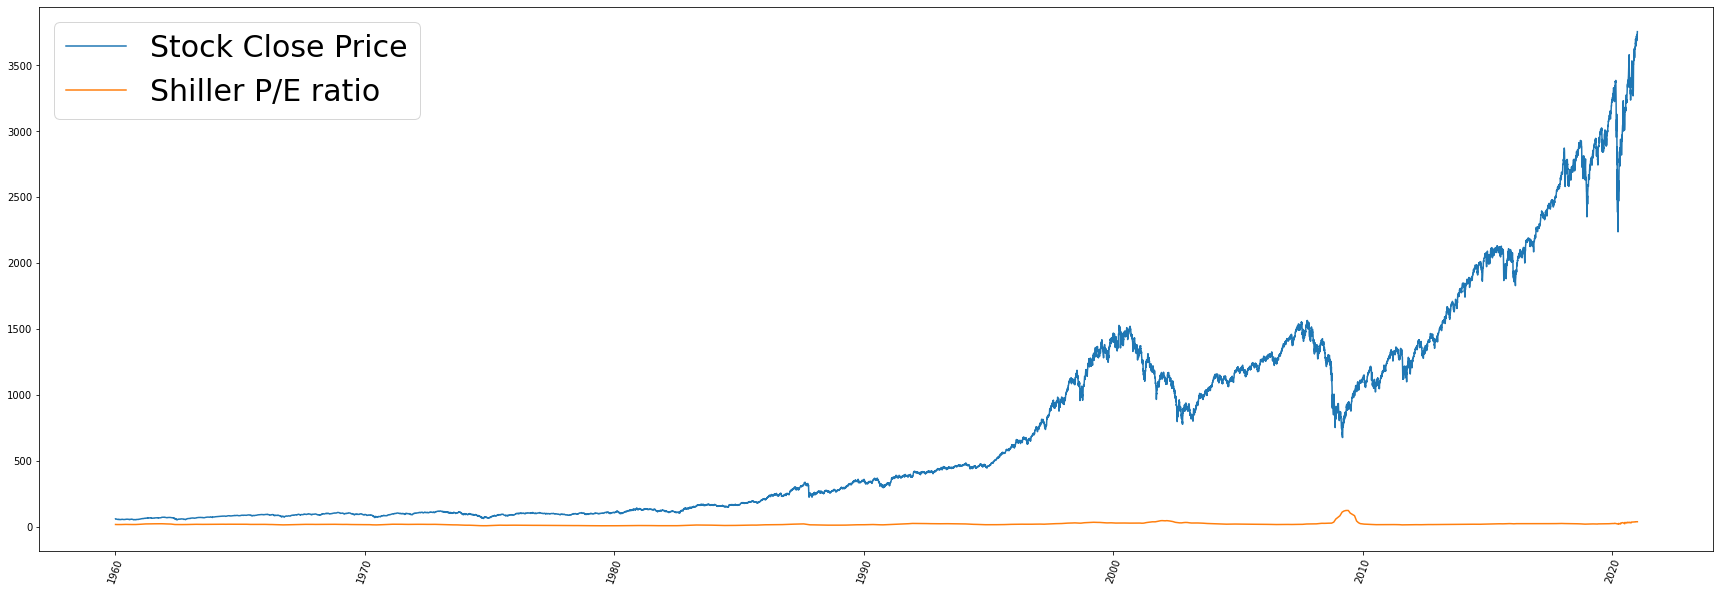

In [ ]:
#VISUALIZING DATA
plt.figure(figsize=(30,10))
plt.plot(data['Date'],data['Adj Close'],label='Stock Close Price')
plt.plot(data['Date'],data['S&P 500 PE Ratio'],label='Shiller P/E ratio')
plt.xticks(rotation=70)
plt.rc('xtick', labelsize=30) 
plt.rc('ytick', labelsize=30)
plt.rc('legend', fontsize=30) 
plt.legend()

**STUDYING TRENDS IN STOCK CLOSE PRICE WITH RESPECT TO SHRILLER P/E RATIO**

In [ ]:

def find_trends(data,colname):
  peaks2,_ = find_peaks(data[colname],width = 180) 
  lows,_ = find_peaks(-data[colname],width = 180) 
  #local maxima points
  peaks ={'date':[],'peak':[]}
  for p in peaks2:
    peaks['date'].append(data['Date'].loc[p])
    peaks['peak'].append(data[colname].loc[p])
  peak = pd.DataFrame(data=peaks)
  #local minima points
  lowp ={'date':[],'low':[]}
  for l in lows:
    lowp['date'].append(data['Date'].loc[l])
    lowp['low'].append(data[colname].loc[l])
  low = pd.DataFrame(data=lowp)
  #plotting graph
  plt.style.use('default')
  plt.plot(peak['date'],peak['peak'],'+',label='sell',color='green')
  plt.plot(low['date'],low['low'],'.',label = 'buy',color='red')
  plt.plot(data['Date'],data[colname],color='orange',label = colname)
  plt.legend()


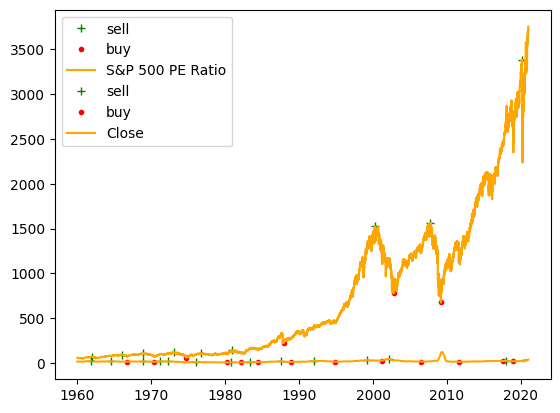

In [ ]:
find_trends(data,'S&P 500 PE Ratio')
find_trends(data,'Close')

In [ ]:
#

**CORRELATING STOCK DATA AND SHRILLER P/E RATIO TO RECOGNIZE BUY/SELL PATTERNS**

In [ ]:
def get_max_min(prices, smoothing, window_range):
    #print(prices.head())
    smooth_prices = prices['Close'].rolling(window=smoothing).mean()
    local_max = argrelextrema(smooth_prices.values, np.greater)[0]
    local_min = argrelextrema(smooth_prices.values, np.less)[0]
    price_local_max_dt = []
    for i in local_max:
        if (i>window_range) and (i<len(prices)-window_range):
            price_local_max_dt.append(prices.iloc[i-window_range:i+window_range]['Close'].idxmax())
    price_local_min_dt = []
    for i in local_min:
        if (i>window_range) and (i<len(prices)-window_range):
            price_local_min_dt.append(prices.iloc[i-window_range:i+window_range]['Close'].idxmin())  
    maxima = pd.DataFrame(prices.loc[price_local_max_dt])
    minima = pd.DataFrame(prices.loc[price_local_min_dt])
    max_min = pd.concat([maxima, minima]).sort_index()
    max_min = max_min.reset_index()
    p = prices.reset_index()   
    return max_min

In [ ]:
smoothing = 3
window = 10
minmax = get_max_min(data[['Date','Open','High','Low','Close']], smoothing, window)

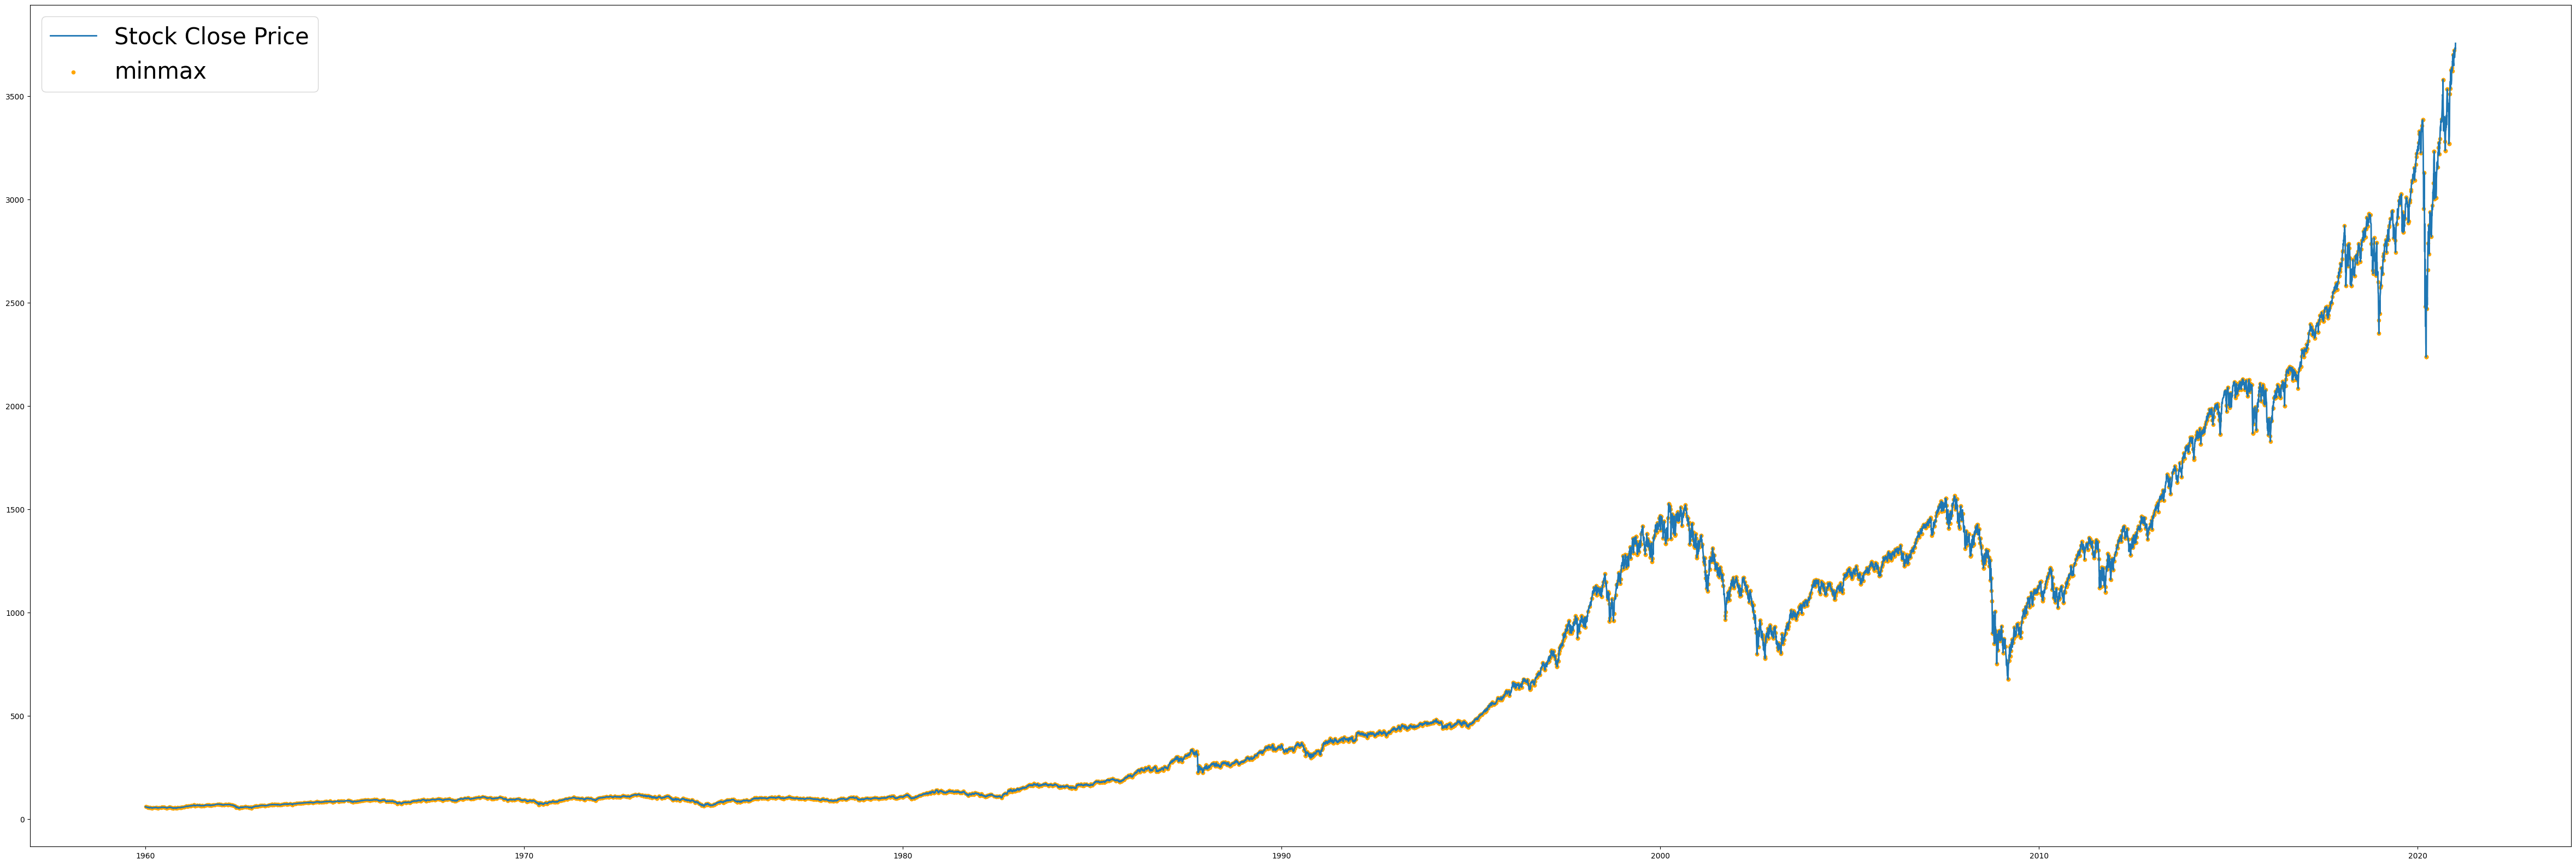

In [ ]:
#PLOTTING MINMAX VALUES ON THE STOCK MARKET CHART
plt.figure(figsize=(60,20))
plt.plot(data['Date'],data['Close'],linewidth=2,label='Stock Close Price')
plt.scatter(minmax['Date'],minmax['Close'],color='orange',marker='o',label='minmax',s=20)
plt.rc('xtick', labelsize=30) 
plt.rc('ytick', labelsize=30)
plt.rc('legend', fontsize=30) 
plt.legend()

In [ ]:
#RECOGNIZING ABCD PATTERNS
signal = [0 for i in range(data.shape[0])]
sliding_window = 5
max_min = minmax
patterns = defaultdict(list)

for i in range(sliding_window, max_min.shape[0]):
    windows = max_min.iloc[i-sliding_window:i]
   # print(windows['Close'].iloc[0]," idxxxx")
    if windows.index[-1] - windows.index[0] > 100:      
        continue
    a = windows['Close'].iloc[0]
    b = windows['Close'].iloc[1]
    c = windows['Close'].iloc[2]
    d = windows['Close'].iloc[3]
    e = windows['Close'].iloc[4]
    A = (windows['Close'].iloc[1]-windows['Close'].iloc[0])
    B = (windows['Close'].iloc[2]-windows['Close'].iloc[1])
    C = (windows['Close'].iloc[3]-windows['Close'].iloc[2])
    D = (windows['Close'].iloc[4]-windows['Close'].iloc[3])
    #print(a,b,c,d,e)
    if( b>a and c<b and c>a and d>b and abs(A-C)<=1):
        patterns['ABCD'].append((windows.index[0], windows.index[-1]))
        if(windows['index'].iloc[0]>windows['index'].iloc[-1]):
            signal[windows['index'].iloc[0]]=1.0
            signal[windows['index'].iloc[2]]=1.0
            signal[windows['index'].iloc[-1]]=-1.0
            signal[windows['index'].iloc[3]]=-1.0
        else:
            signal[windows['index'].iloc[0]]=-1.0
            signal[windows['index'].iloc[2]]=-1.0
            signal[windows['index'].iloc[-1]]=1.0
            signal[windows['index'].iloc[3]]=1.0
        
        
        
    
data['Signal'] = signal

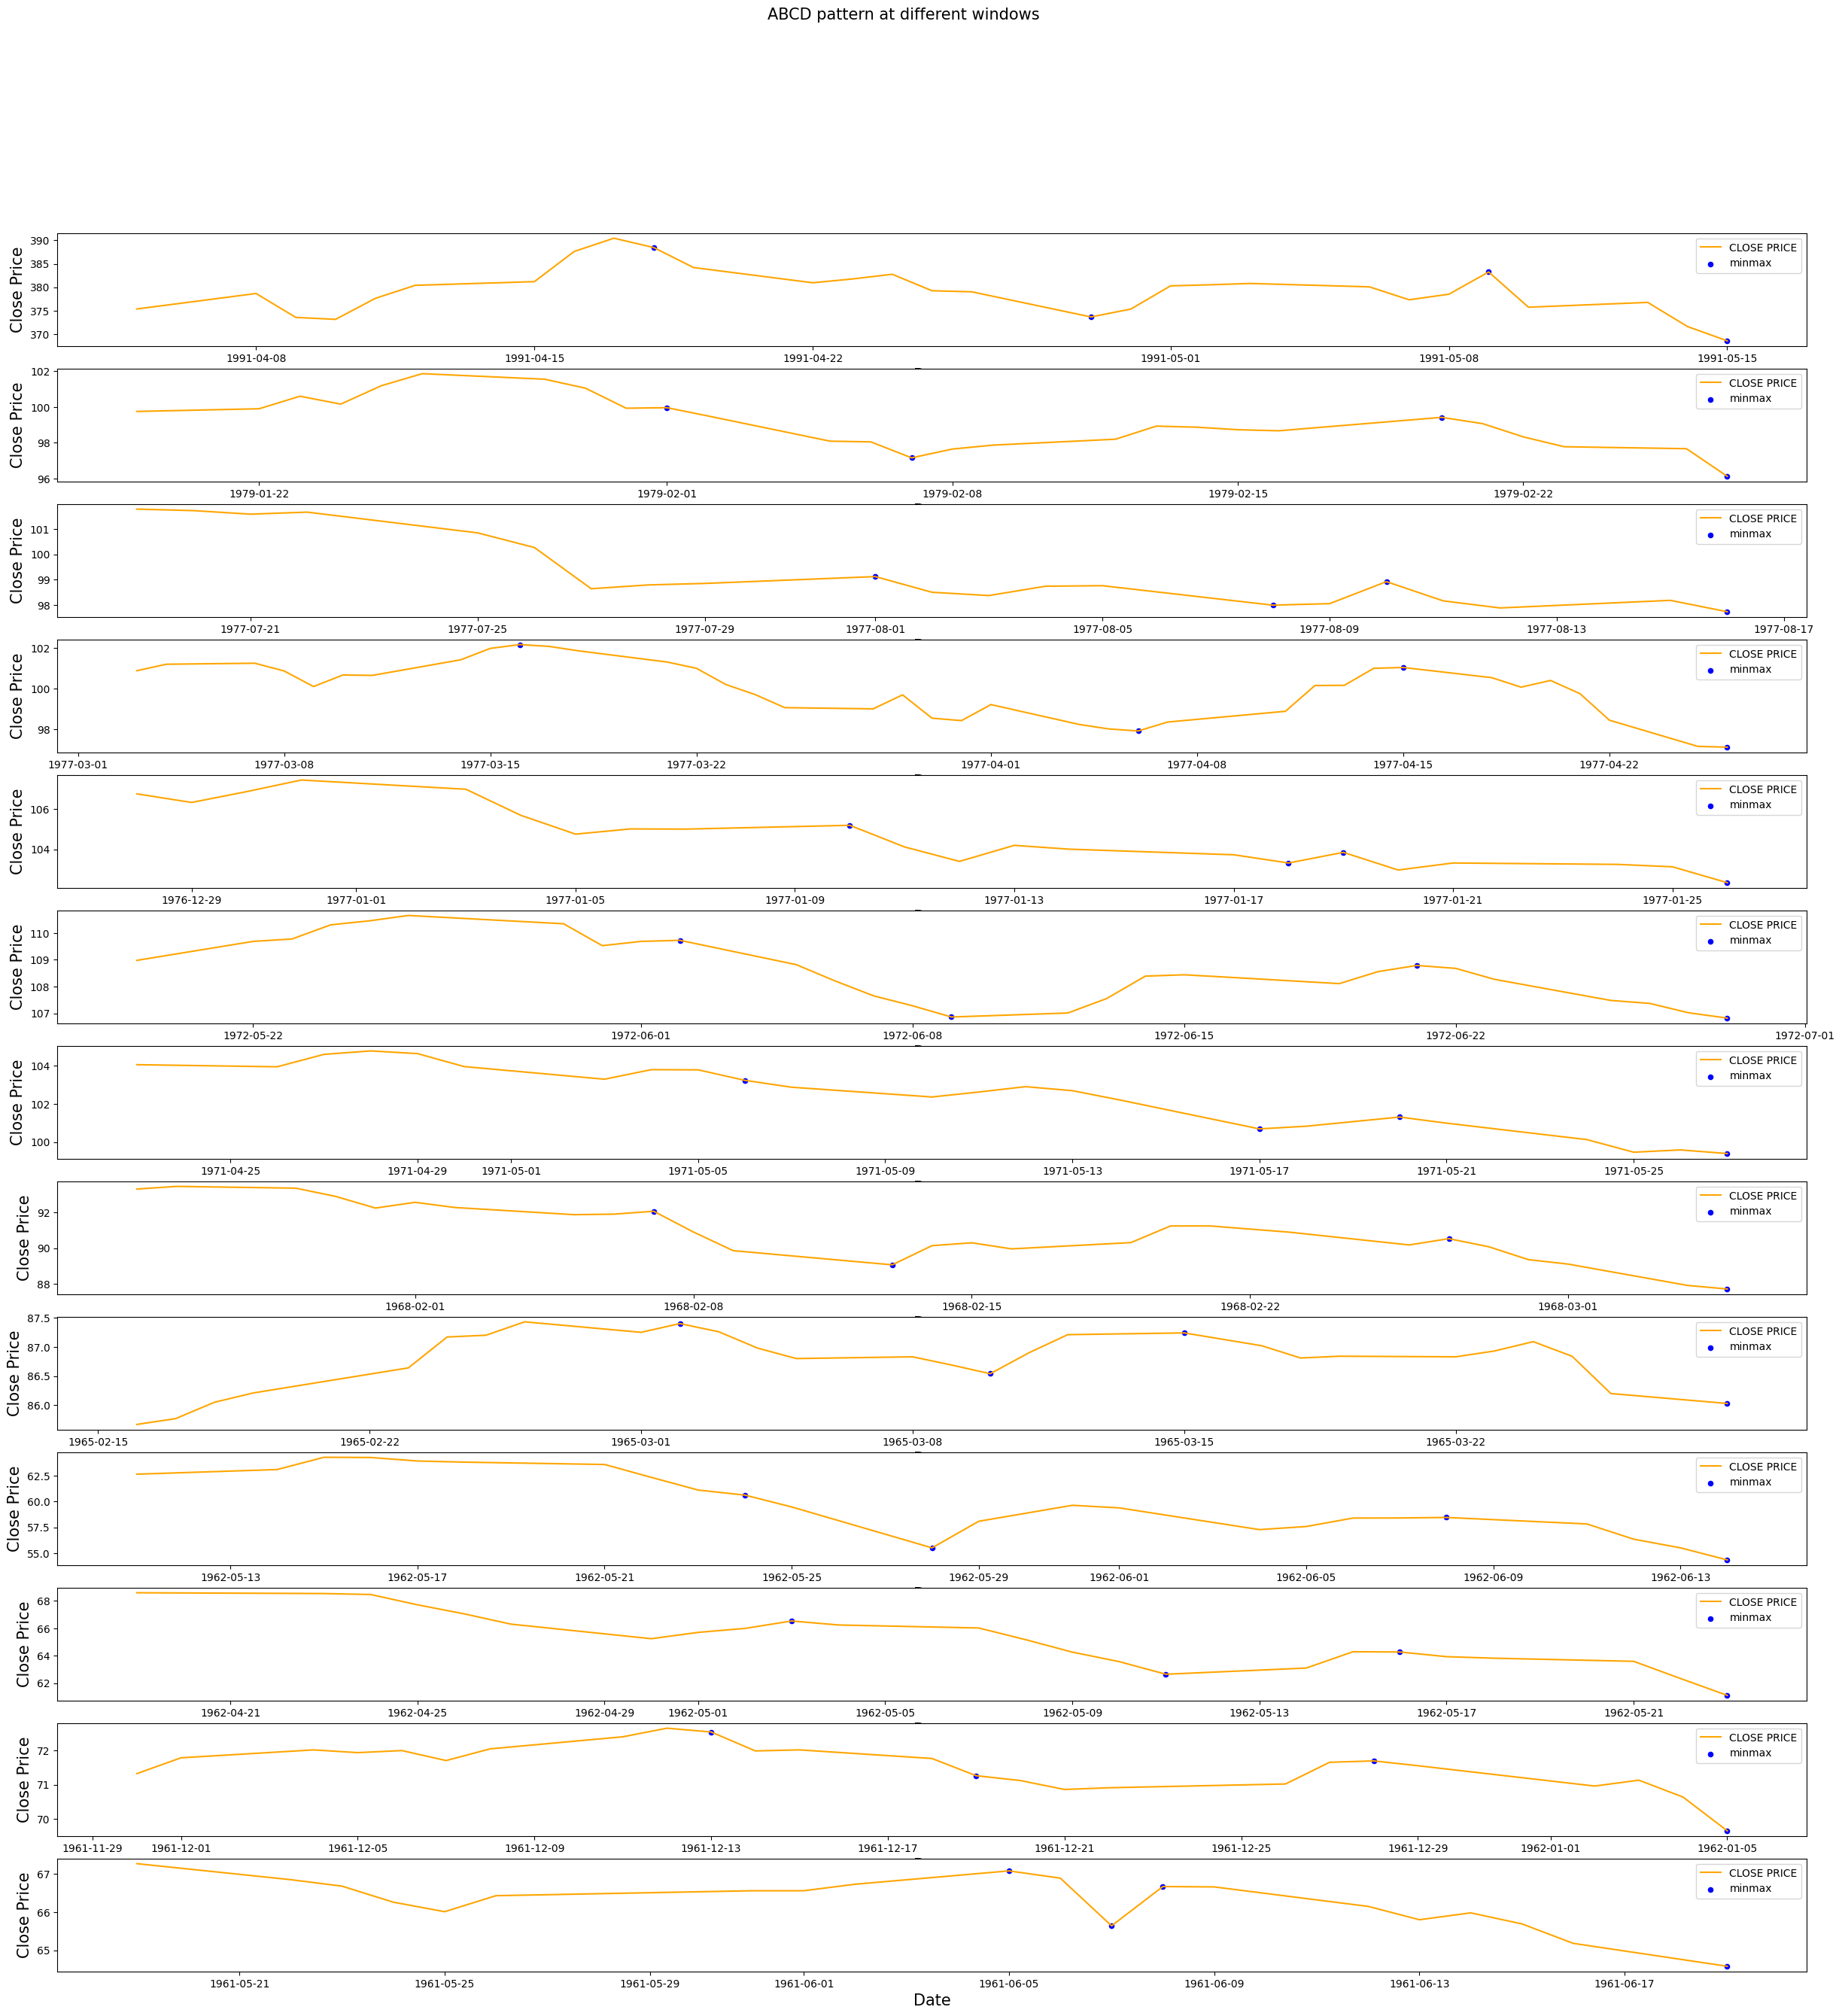

In [ ]:
# VISUALIZING ABCD PATTERNS

plt.style.use('default')
fig, axs = plt.subplots(len(patterns['ABCD']),figsize=(30,30))
fig.suptitle('ABCD pattern at different windows',fontsize=15)
counter = 0
for p in patterns['ABCD']:
    window = minmax[p[0]:p[1]]
    #print(window)
    start = window['index'].iloc[0]
    end = window['index'].iloc[3]+10
    #print(start,end)
    axs[counter].plot(data['Date'][start:end],data['Close'][start:end],color='orange',label="CLOSE PRICE")
    axs[counter].scatter(window['Date'],window['Close'],color='blue',marker='o',label='minmax',s=20)
    axs[counter].set_xlabel('Date', fontsize = 15)
    axs[counter].set_ylabel('Close Price', fontsize = 15)
    #plt.rc('xtick', labelsize=10) 
    #plt.rc('ytick', labelsize=10)
    #plt.rc('legend', fontsize=10) 
    axs[counter].legend()
    counter+=1

**PREDICTING BUY AND SELL TRENDS FOR $1 MILLION INVESTMENT**

In [ ]:
def investment_activity(data,op):
  sliding_window = 180
  total_columns=len(data.columns)
  windows=[]
  labels_a=[]
  labels_b=[]
  for idx in range(data.shape[0]-(sliding_window + total_columns)):
      w=data.loc[range(idx,idx+(sliding_window)),:]
      #print(idx)
      windows.append(w.values)
      #print(w['Close'].iloc[0],w['Close'].iloc[w.shape[0]-1])
      if w['Close'].iloc[0]>w['Close'].iloc[w.shape[0]-1]:
          labels_a.append(1.0)
          labels_b.append([1.0,0.0])
      else:
          labels_a.append(-1.0)
          labels_b.append([0.0,1.0])
  if(op==1):
    return labels_a,windows
  if(op==2):
    return labels_b,windows
  
labels,windows = investment_activity(data[['Open','High','Low','Close','Volume']],1)


In [ ]:
 def buy_stock(real_movement,signal,initial_money = 1000000,max_buy = 1,max_sell = 1):
   
    starting_money = initial_money
    states_sell = []
    states_buy = []
    states_money = []
    current_inventory = 0
    
    day=[]
    total_balance = []
    Status = []
    
    def buy(i, initial_money, current_inventory):

        shares = initial_money // real_movement[i]
        if shares < 1:
            day.append(i)
            total_balance.append(initial_money)
            Status.append("Insuffucuent amount to buy unit price ${0}".format(real_movement[i]))
        else:
            if shares > max_buy:
                buy_units = max_buy
            else:
                buy_units = shares
            initial_money -= buy_units * real_movement[i]
            current_inventory += buy_units
            #print('day %d: buy %d units at price %f, total balance %f'% (i, buy_units, buy_units * real_movement[i], initial_money))
            day.append(i)
            total_balance.append(initial_money)
            Status.append("Bought {0} units for price ${1}".format(buy_units,buy_units*real_movement[i]))
            states_buy.append(0)
        return initial_money, current_inventory
    try:
      for i in range(real_movement.shape[0]-1):
          state = signal[i]
          if state == 1:
              initial_money, current_inventory = buy(i, initial_money, current_inventory)
              states_buy.append(i)
          elif state == -1:
              if current_inventory == 0:
                      day.append(i)
                      total_balance.append(initial_money)
                      Status.append("No Sale")
              else:
                  if current_inventory > max_sell:
                      sell_units = max_sell
                  else:
                      sell_units = current_inventory
                  current_inventory -= sell_units
                  total_sell = sell_units * real_movement[i]
                  initial_money += total_sell
                  try:
                      invest = (
                          (real_movement[i] - real_movement[states_buy[-1]])
                          / real_movement[states_buy[-1]]
                      ) * 100
                  except:
                      invest = 0
                  day.append(i)
                  total_balance.append(initial_money)
                  Status.append("Sold {0} units for price ${1} and investment ${2}".format(sell_units,total_sell,invest))
              states_sell.append(i)
          states_money.append(initial_money)
    except:
      pass
              
      invest = ((initial_money - starting_money) / starting_money) * 100
      total_gains = initial_money - starting_money
      Actions = pd.DataFrame(list(zip(day,total_balance,Status)),columns = ['DAY','TOTAL BALANCE','STATUS'])
      #print(Actions.head(2))
    return Actions



In [ ]:
Activity = buy_stock(data.Close, labels)
Activity.to_csv('Investment_activity.csv', index=False)
Activity.head(50)

,DAY,TOTAL BALANCE,STATUS
0,0,996243.93,Bought 1 units for price $3756.07
1,1,992511.89,Bought 1 units for price $3732.04
2,2,988784.85,Bought 1 units for price $3727.04
3,3,985049.49,Bought 1 units for price $3735.36
4,4,981346.43,Bought 1 units for price $3703.06
5,5,977656.42,Bought 1 units for price $3690.01
6,6,973969.16,Bought 1 units for price $3687.26
7,7,970274.24,Bought 1 units for price $3694.92
8,8,966564.83,Bought 1 units for price $3709.41
9,9,962842.35,Bought 1 units for price $3722.48


**BUILDING CNN TO RECOGNIZE ABCD PATTERN AND GIVE BEARISH CONFIDENCE**

In [ ]:
from sklearn.model_selection import train_test_split
import keras
from keras.models import Model
from keras.models import Sequential
from keras.layers import LeakyReLU,ZeroPadding1D, MaxPooling1D, BatchNormalization, Activation, Dropout, Flatten, Dense
from keras.layers import Convolution1D as Conv1D
from keras.models import load_model
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.utils import class_weight
from sklearn.metrics import confusion_matrix

In [ ]:
labels,windows = investment_activity(data[['Open','High','Low','Close','Volume']],2)
labels=np.array(labels)
windows = np.array(windows)
labels.shape,windows.shape

((15170, 2), (15170, 180, 5))

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(windows,labels,test_size=0.2,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((12136, 180, 5), (3034, 180, 5), (12136, 2), (3034, 2))

In [ ]:
batch_size = 256
num_classes = 2
epochs = 100
input_shape=(X_train.shape[1], 5)

In [ ]:
#MODEL ARCHITECTURE
with tpu_strategy.scope():
  model = Sequential()
  model.add(Conv1D(64, kernel_size=3,padding ='SAME',activation='relu', input_shape=input_shape))
  model.add(BatchNormalization())
  model.add(MaxPooling1D(pool_size=(2)))
  model.add(LeakyReLU(alpha=0.2))
  model.add(Conv1D(32,kernel_size=3,padding = 'SAME', activation='relu'))
  model.add(BatchNormalization())
  model.add(MaxPooling1D(pool_size=(2)))
  model.add(LeakyReLU(alpha=0.2))
  model.add(Conv1D(16,kernel_size=3,padding = 'SAME', activation='relu'))
  model.add(BatchNormalization())
  model.add(MaxPooling1D(pool_size=(2)))
  model.add(LeakyReLU(alpha=0.2))
  model.add(Conv1D(8,kernel_size=3,padding = 'SAME', activation='relu'))
  model.add(BatchNormalization())
  model.add(MaxPooling1D(pool_size=(2)))
  model.add(LeakyReLU(alpha=0.2))
  model.add(Conv1D(4,kernel_size=3,padding = 'SAME', activation='relu'))
  model.add(BatchNormalization())
  model.add(MaxPooling1D(pool_size=(2)))
  model.add(LeakyReLU(alpha=0.2))
  model.add(Flatten())
  model.add(Dense(8, activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(4, activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(16, activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(2, activation='softmax'))
  model.summary()

  model.compile(loss = 'categorical_crossentropy',
                      optimizer='adam',
                      metrics=['accuracy'])



Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_5 (Conv1D)            (None, 180, 64)           1024      
_________________________________________________________________
batch_normalization_5 (Batch (None, 180, 64)           256       
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 90, 64)            0         
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 90, 64)            0         
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 90, 32)            6176      
_________________________________________________________________
batch_normalization_6 (Batch (None, 90, 32)            128       
_________________________________________________________________
max_pooling1d_6 (MaxPooling1 (None, 45, 32)           

In [ ]:
#TRAINING THE MODEL TO PREDICT BUY/SELL SIGNAL
model.fit(X_train,y_train,epochs=50,verbose=1)

Epoch 1/50
380/380 [==============================] - 15s 21ms/step - loss: 0.7014 - accuracy: 0.6154
Epoch 2/50
380/380 [==============================] - 7s 18ms/step - loss: 0.5974 - accuracy: 0.7203
Epoch 3/50
380/380 [==============================] - 7s 18ms/step - loss: 0.6036 - accuracy: 0.7106
Epoch 4/50
380/380 [==============================] - 7s 18ms/step - loss: 0.5925 - accuracy: 0.7202
Epoch 5/50
380/380 [==============================] - 7s 18ms/step - loss: 0.5964 - accuracy: 0.7144
Epoch 6/50
380/380 [==============================] - 7s 18ms/step - loss: 0.5968 - accuracy: 0.7153
Epoch 7/50
380/380 [==============================] - 7s 18ms/step - loss: 0.5968 - accuracy: 0.7139
Epoch 8/50
380/380 [==============================] - 7s 18ms/step - loss: 0.5888 - accuracy: 0.7244
Epoch 9/50
380/380 [==============================] - 7s 18ms/step - loss: 0.5934 - accuracy: 0.7163
Epoch 10/50
380/380 [==============================] - 7s 18ms/step - loss: 0.5931 - accur

In [ ]:
#Saving model
model.save("./cnn.h5")

In [ ]:
#model predictions
y_pred = model.predict(X_test)

In [ ]:
#MODEL EVALUATION
score = model.evaluate(X_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.47355639934539795
Test accuracy: 0.784113347530365


In [ ]:
y_pred = [np.argmax(y) for y in y_pred]
y_test = [np.argmax(y) for y in y_test]

precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print("Precision: ", precision)
print("Recall: ", recall)

Precision:  0.8193764629592566
Recall:  0.7841133816743573


[[2169   13]
 [ 642  210]]


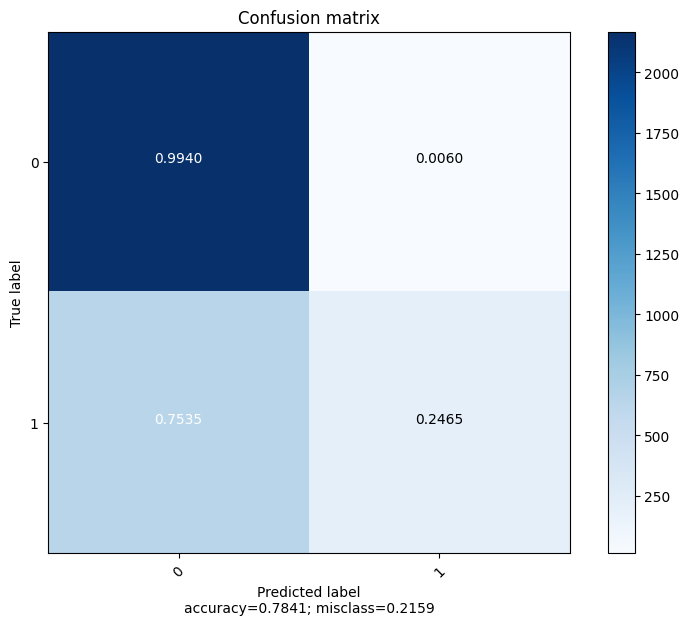

In [ ]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()


labels = [0,1]
cm = confusion_matrix(y_test, y_pred,labels)
print(cm)
plot_confusion_matrix(cm,
                          [0,1],
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True)

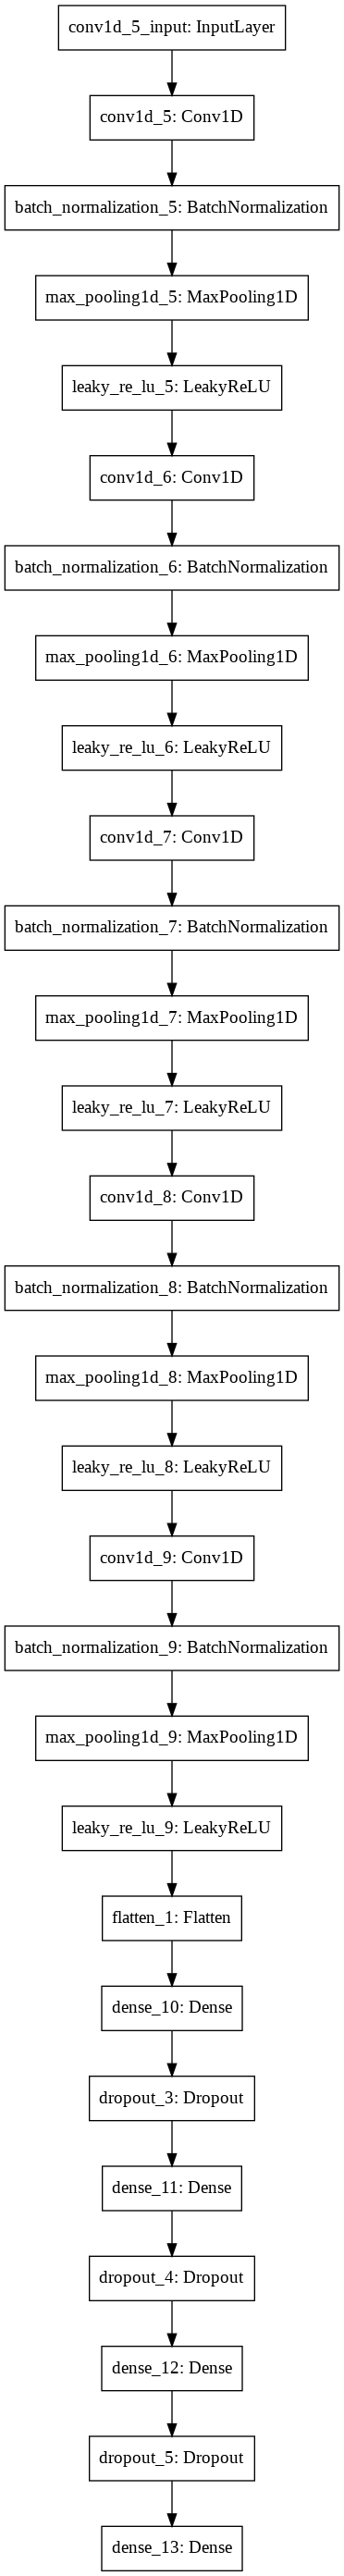

In [ ]:
model = load_model('./cnn.h5')
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model.png')

**BUILDING RNN THAT USES BEARISH CONFIDENCE AND SHRILLER P/E RATIO TO PREDICT FUTURE STOCK PRICES**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.callbacks import EarlyStopping
from keras.callbacks import TensorBoard
from keras.optimizers import SGD

In [ ]:
def load_data(stock, seq_len):
    amount_of_features = 4
    data = stock
    sequence_length = seq_len + 1
    result = []
    for index in range(len(data) - sequence_length):
        result.append(data[index: index + sequence_length])

    result = np.array(result)
    row = round(0.9 * result.shape[0])
    train = result[:int(row), :]
    x_train = train[:, :-1]
    y_train = train[:, -1][:,-1]
    x_test = result[int(row):, :-1]
    y_test = result[int(row):, -1][:,-1]

    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], amount_of_features))
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], amount_of_features))  

    return [x_train, y_train, x_test, y_test]

In [ ]:
def build_model2():
        d = 0.2
        model = Sequential()
        model.add(LSTM(128, input_shape=(22, 9), return_sequences=True))
        model.add(Dropout(d))
        model.add(LSTM(64, input_shape=(22, 9), return_sequences=False))
        model.add(Dropout(d))
        model.add(Dense(16,kernel_initializer='uniform',activation='relu'))        
        model.add(Dense(1,kernel_initializer='uniform',activation='linear'))
        model.compile(loss='mse',optimizer='adam',metrics=['accuracy'])
        model.summary()
        return model

In [ ]:
window = 22
df = data[['Open','High','Low','Close']].values
sc= MinMaxScaler(feature_range=(0,1))
df[:,0:5] = sc.fit_transform(df[:,:])
X_train, y_train, X_test, y_test = load_data(df, window)
print("X_train", X_train.shape)
print("y_train", y_train.shape)
print("X_test", X_test.shape)
print("y_test", y_test.shape)

X_train (13799, 22, 4)
y_train (13799,)
X_test (1533, 22, 4)
y_test (1533,)


In [ ]:
model = build_model2()

Model: "sequential_59"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_107 (LSTM)              (None, 22, 128)           70656     
_________________________________________________________________
dropout_74 (Dropout)         (None, 22, 128)           0         
_________________________________________________________________
lstm_108 (LSTM)              (None, 64)                49408     
_________________________________________________________________
dropout_75 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_60 (Dense)             (None, 16)                1040      
_________________________________________________________________
dense_61 (Dense)             (None, 1)                 17        
Total params: 121,121
Trainable params: 121,121
Non-trainable params: 0
_______________________________________________

In [ ]:
model.fit(
    X_train,
    y_train,
    batch_size=512,
    epochs=50,
    validation_split=0.2,
    verbose=1)


Epoch 1/50
22/22 [==============================] - 7s 190ms/step - loss: 0.0832 - accuracy: 0.0000e+00 - val_loss: 0.0010 - val_accuracy: 0.0000e+00
Epoch 2/50
22/22 [==============================] - 3s 150ms/step - loss: 0.0101 - accuracy: 0.0000e+00 - val_loss: 9.3617e-05 - val_accuracy: 0.0000e+00
Epoch 3/50
22/22 [==============================] - 3s 151ms/step - loss: 0.0012 - accuracy: 0.0000e+00 - val_loss: 1.5487e-04 - val_accuracy: 0.0000e+00
Epoch 4/50
22/22 [==============================] - 3s 150ms/step - loss: 6.4147e-04 - accuracy: 0.0000e+00 - val_loss: 8.3742e-05 - val_accuracy: 0.0000e+00
Epoch 5/50
22/22 [==============================] - 3s 150ms/step - loss: 5.7718e-04 - accuracy: 0.0000e+00 - val_loss: 3.4632e-05 - val_accuracy: 0.0000e+00
Epoch 6/50
22/22 [==============================] - 3s 150ms/step - loss: 5.6220e-04 - accuracy: 0.0000e+00 - val_loss: 1.2288e-05 - val_accuracy: 0.0000e+00
Epoch 7/50
22/22 [==============================] - 3s 152ms/step - 

In [ ]:
model.save('./RNN.h5')

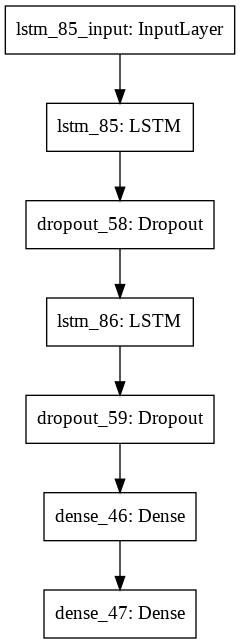

In [ ]:
model = load_model('./RNN.h5')
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model.png')

In [ ]:
#stock predictions
preds= model.predict(X_test)

In [ ]:
preds,y_test

(array([[0.01356764],
        [0.01356596],
        [0.01355556],
        ...,
        [0.01197437],
        [0.0120107 ],
        [0.01205131]], dtype=float32),
 array([0.01092101, 0.01088861, 0.01078872, ..., 0.00202221, 0.002141  ,
        0.0022112 ]))

In [ ]:
trainScore = model.evaluate(X_train, y_train, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore[0], math.sqrt(trainScore[0])))

testScore = model.evaluate(X_test, y_test, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore[0], math.sqrt(testScore[0])))

Train Score: 0.00 MSE (0.01 RMSE)
Test Score: 0.00 MSE (0.01 RMSE)


In [ ]:
for i in range(0,preds.shape[0]):
    pred_error = (preds[i]-y_test[i])/y_test[i]
    pred.append(pred_error)
print('Accuracy:', 100 - (100*(abs(y_test-preds)/y_test)).mean())
len(pred)

Accuracy: -inf


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.


13797

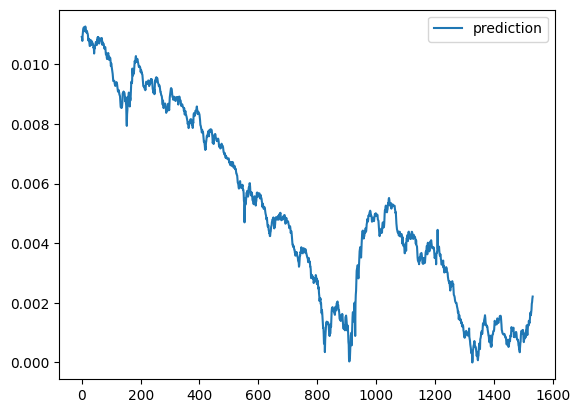

In [ ]:
plt.plot(y_test,label='prediction')
plt.legend()

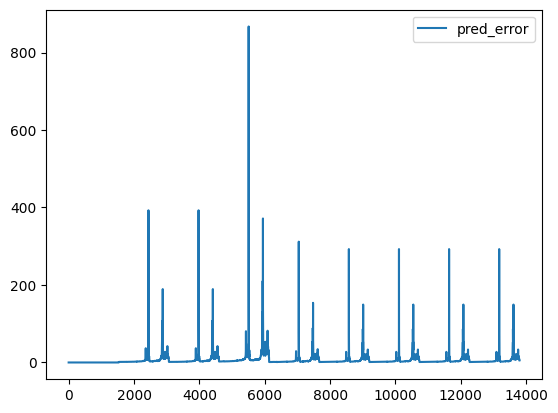

In [ ]:
plt.plot(pred,label="pred_error")
plt.legend()

In [ ]:
# Predicting investment trend for noiseless data by the model
model = keras.models.load_model('./cnn.h5')

In [ ]:
labels,windows = investment_activity(data[['Open','High','Low','Close','Volume']],2)
labels=np.array(labels)
windows = np.array(windows)
labels.shape,windows.shape

((15170, 2), (15170, 180, 5))

In [ ]:
cnn_pred = model.predict(windows)

In [ ]:
cnn_pred
signal=[]
for c in range(cnn_pred.shape[0]):
  if(cnn_pred[c][0]>cnn_pred[c][1]):
    signal.append(1.0)
  else:
    signal.append(-1.0)
len(signal)

15170

In [ ]:
#investment activity using patterns predicted by the model
Activity = buy_stock(data.Close, signal)
Activity.to_csv('Investment_activity_cnn_noiseless.csv', index=False)
Activity.head(50)

,DAY,TOTAL BALANCE,STATUS
0,0,996243.93,Bought 1 units for price $3756.07
1,1,992511.89,Bought 1 units for price $3732.04
2,2,988784.85,Bought 1 units for price $3727.04
3,3,985049.49,Bought 1 units for price $3735.36
4,4,981346.43,Bought 1 units for price $3703.06
5,5,985036.44,Sold 1 units for price $3690.01 and investment...
6,6,988723.70,Sold 1 units for price $3687.26 and investment...
7,7,985028.78,Bought 1 units for price $3694.92
8,8,981319.37,Bought 1 units for price $3709.41
9,9,977596.89,Bought 1 units for price $3722.48


In [ ]:
#generating noisy data
from sklearn.preprocessing import MinMaxScaler
clean_signal = data[['Open','High','Low','Close']].values
print(clean_signal)

[[3733.27 3760.2  3726.88 3756.07]
 [3736.19 3744.63 3730.21 3732.04]
 [3750.01 3756.12 3723.31 3727.04]
 ...
 [  60.13   60.13   60.13   60.13]
 [  60.39   60.39   60.39   60.39]
 [  59.91   59.91   59.91   59.91]]


In [ ]:
stddev_dir={0.1:'./dataset/noisy/dev1.csv',0.01:'./dataset/noisy/dev01.csv',0.02:'./dataset/noisy/dev02.csv',0.03:'./dataset/noisy/dev03.csv',0.05:'./dataset/noisy/dev05.csv',
           0.001:'./dataset/noisy/dev001.csv',0.002:'./dataset/noisy/dev002.csv',0.003:'./dataset/noisy/dev003.csv',0.005:'./dataset/noisy/dev005.csv'}

In [ ]:
for s in stddev_dir:
  noise = np.random.normal(mu, s, [15355,4]) 
 # print(noise)
  signal = clean_signal + noise
  #print(signal.shape)
  open = []
  high = []
  low = []
  close = []
  for i in range(signal.shape[0]):
    open.append(signal[i][0])
    high.append(signal[i][1])
    low.append(signal[i][2])
    close.append(signal[i][3])
  df = pd.DataFrame(zip(open,high,low,close),columns=["Open","High","Low","Close"])
  df.to_csv(stddev_dir[s])
 

In [ ]:
model = keras.models.load_model('./cnn.h5')

for s in stddev_dir:
  df = pd.read_csv(stddev_dir[s],index_col=0)
  
  df['Volume'] = data['Volume'].values
  #print(df.columns)
  labels,windows = investment_activity(df[['Open','High','Low','Close','Volume']],2)
  labels=np.array(labels)
  windows = np.array(windows)
  labels.shape,windows.shape

  cnn_pred = model.predict(windows)

  signal=[]
  for c in range(cnn_pred.shape[0]):
    if(cnn_pred[c][0]>cnn_pred[c][1]):
      signal.append(1.0)
    else:
      signal.append(-1.0)

  Activity = buy_stock(df.Close, signal)
  Activity.to_csv('Investment_activity_cnn_noisy_{}.csv'.format(s), index=False)
print("COMPLETED PREDECTING INVESTMENT ACTIVITY FOR NOISY DATA")



COMPLETED PREDECTING INVESTMENT ACTIVITY FOR NOISY DATA
